# PRAVEER SAXENA BATCH NO. 1814

# MULTICLASS CLASSIFICATION USING CONVOLUTIONAL NEURAL NETWORK


# SAREE VS SHIRT VS T-SHIRT

In [1]:
#Let us confirm the number of images in traing and test set
import glob
myPath_ts = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/saree/'
saree_images_train = len(glob.glob1(myPath_ts,"*.jpg"))
print('The number of saree images in training_set is : ',saree_images_train)
myPath_tsh = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/shirt/'
shirt_images_train = len(glob.glob1(myPath_tsh,"*.jpg"))
print('The number of shirt images in training_set is : ',shirt_images_train)
myPath_tts = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/tshirt/'
tshirt_images_train = len(glob.glob1(myPath_tts,"*.jpg"))
print('The number of tshirt images in training_set is : ',tshirt_images_train)

myPath_tts = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/test_set/saree/'
saree_images_test = len(glob.glob1(myPath_tts,"*.jpg"))
print('The number of saree images in test_set is : ',saree_images_test)
myPath_ttsh = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/test_set/shirt/'
shirt_images_test = len(glob.glob1(myPath_ttsh,"*.jpg"))
print('The number of shirt images in test_set is : ',shirt_images_test)
myPath_ttts = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/test_set/tshirt/'
tshirt_images_test = len(glob.glob1(myPath_ttts,"*.jpg"))
print('The number of tshirt images in test_set is : ',tshirt_images_test)

The number of saree images in training_set is :  100
The number of shirt images in training_set is :  100
The number of tshirt images in training_set is :  100
The number of saree images in test_set is :  19
The number of shirt images in test_set is :  19
The number of tshirt images in test_set is :  19


In [2]:
#Import the required libraries for cnn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


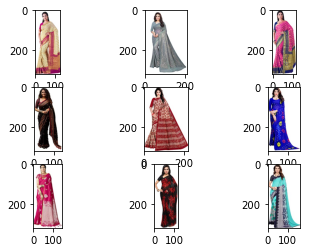

In [3]:
# plot saree photos from the fashiondataset
# define location of dataset
folder = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/saree/'
# plot first few images
for i in range(1,10):
	# define subplot
	pyplot.subplot(330 + i)
	# define filename
	filename = folder + 'saree-' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

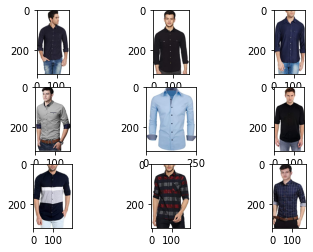

In [4]:
# plot shirt photos from the fashiondataset
# define location of dataset
folder = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/shirt/'
# plot first few images
for i in range(1,10):
	# define subplot
	pyplot.subplot(330 + i)
	# define filename
	filename = folder + 'shirt-' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

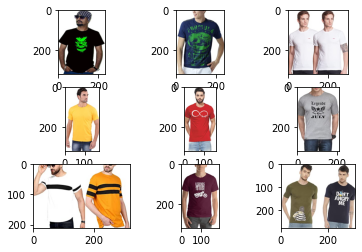

In [5]:
# plot tshirt photos from the fashiondataset
# define location of dataset
folder = 'E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set/tshirt/'
# plot first few images
for i in range(1,10):
	# define subplot
	pyplot.subplot(330 + i)
	# define filename
	filename = folder + 'tshirt-' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Findings: We can see that the different images have different resolution/sizes, we need to normalize them

# Image Augmentation and scaling

1.Now we need to do image augmentation to effectively create more images from these exisiting training data and prevent overfitting and also scale the images.

2.Also converting all images to have one size i.e (64,64)

In [6]:
# we are creating all images to have one size i.e. (64,64)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 300 images belonging to 3 classes.


In [7]:
#Applying scaling on test data
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('E:\\DataTrained\\Convolutional Neural Networks\\fashiondataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 57 images belonging to 3 classes.


# Creation of Convolution neural Network

In [8]:
#Instantiating the Sequential class
model = Sequential()

# Adding 1st convolutional layer for feature extraction
model.add(Conv2D(filters=32,kernel_size=3, padding ='same', activation='relu',input_shape= (64,64,3)))

#Adding Maxpooling for downsampling
model.add(MaxPool2D(pool_size=(2,2),strides=2))

#Adding 2nd Convolutional layer for feature extraction
model.add(Conv2D(filters=64,kernel_size=3,padding ='same', activation='relu'))

#Adding Maxpooling for  downsampling
model.add(MaxPool2D(pool_size=(2,2),strides=2))

# Flatting the output of pooling layer
model.add(Flatten())

# Adding dropout to deactivate few neurons so that overfitting can be avoided
model.add(Dropout(0.3))

# Adding fully connected layer
model.add(Dense(units=64,activation='relu'))

#Further adding the dropout to avoid overfitting
model.add(Dropout(0.5))
model.add(Dense(units=3,activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

# Compiling the created MODEL

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Training on Training data and testing on test data

In [11]:
model.fit(x=training_set,validation_data=test_set,epochs=25)

Epoch 1/25
10/10 [==============================] - 2s 207ms/step - loss: 1.1400 - accuracy: 0.3933 - val_loss: 0.9177 - val_accuracy: 0.7368
Epoch 2/25
10/10 [==============================] - 2s 202ms/step - loss: 0.9724 - accuracy: 0.5167 - val_loss: 0.7833 - val_accuracy: 0.7018
Epoch 3/25
10/10 [==============================] - 2s 196ms/step - loss: 0.8044 - accuracy: 0.6933 - val_loss: 0.5001 - val_accuracy: 0.8246
Epoch 4/25
10/10 [==============================] - 2s 200ms/step - loss: 0.6595 - accuracy: 0.7467 - val_loss: 0.4162 - val_accuracy: 0.8772
Epoch 5/25
10/10 [==============================] - 2s 208ms/step - loss: 0.5663 - accuracy: 0.7733 - val_loss: 0.1956 - val_accuracy: 0.9123
Epoch 6/25
10/10 [==============================] - 2s 196ms/step - loss: 0.4829 - accuracy: 0.7867 - val_loss: 0.2892 - val_accuracy: 0.8947
Epoch 7/25
10/10 [==============================] - 2s 206ms/step - loss: 0.4622 - accuracy: 0.8167 - val_loss: 0.2048 - val_accuracy: 0.9123
Epoch 

# We are getting a test accuracy of arround 91% and training accuracy of  around 90%. 

# Saving the Model for later use

In [12]:
# Both the archtitecture of the model and  learned weights will be saved
model.save('fashionmodel.h5')

# Lets check the saved model by loading it

In [13]:
from keras.models import load_model
test_model = load_model('fashionmodel.h5')
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               